### Détectection des faux billets avec Python

## 1. Preliminary

     *** Contexte ***

Identification des contrefaçons des billets en euros

Les billets d'euro ont des valeurs nominales de 5, 10, 20, 50, 100, 200 et 500 euros. 

In [1]:
!python -V

Python 3.9.13


## 1.1 Install

In [2]:
#!pip install --upgrade seaborn
#!pip install --upgrade pandas
#!pip install pandas --user
#!pip install --upgrade numexpr
#!pip install --upgrade bottleneck

#!pip install --upgrade matplotlib
#!pip install matplotlib --user

# 1.2 Importation

## 1.2.1 Importation des librairies

In [3]:
#builtin
import os

In [4]:

#data
import pandas as pd
import numpy as np

In [5]:

#visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn.model_selection import LearningCurveDisplay
%matplotlib inline

In [6]:
#machine learning
    #estimation
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
    #standardization
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

## 2.1 chargement des fichiers

In [7]:
input_folder = r"C:\Users\Nada\Desktop\OpenClassRooms\Projet 10\Data\0 Source"
# Read CSV train data file into DataFrame
train_df= pd.read_csv(os.path.join(input_folder, "billets.csv"), dtype=float, sep=';')
# Read CSV test data file into DataFrame
test_df = pd.read_csv(os.path.join(input_folder, "billets_production.csv"), sep=',')

## 2. Prétraitement des données

## 2.2 Exploration

In [8]:
#Affichage des 5 premieres lignes
train_df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1.0,171.81,104.86,104.95,4.52,2.89,112.83
1,1.0,171.46,103.36,103.66,3.77,2.99,113.09
2,1.0,172.69,104.48,103.50,4.40,2.94,113.16
3,1.0,171.36,103.91,103.94,3.62,3.01,113.51
4,1.0,171.73,104.28,103.46,4.04,3.48,112.54


In [9]:
print('Le nombre des itemes dans le DataFrame train_df est {}.'.format(train_df.shape[0]))

Le nombre des itemes dans le DataFrame train_df est 1500.


In [10]:
# preview test data
test_df

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


test DataFrame contient 5 lignes sans valeurs manquantes.

In [11]:
print('Le nombre des itemes dans le DataFrame train_df est {}.'.format(test_df.shape[0]))

Le nombre des itemes dans le DataFrame train_df est 5.


Note: On ne voit pas la colonne 'is_genuine' (la target) dans le dataset test_df. Notre objectif est alors de prédire la target par differentes algorithmes de machine learning scomme la regression logistique.

In [12]:
#Affichage des 5 dernieres lignes
train_df.tail()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1495,0.0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0.0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0.0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0.0,172.06,104.28,104.06,5.17,3.46,112.25
1499,0.0,171.47,104.15,103.82,4.63,3.37,112.07


In [13]:
#Affichage de 5 lignes arbitrairement
train_df.sample(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
477,1.0,171.95,104.25,103.64,3.24,2.81,113.42
934,1.0,172.17,104.27,104.32,4.52,3.32,113.48
431,1.0,172.14,103.80,103.56,3.94,3.12,113.38
1294,0.0,172.40,104.27,104.18,4.92,3.17,111.79
1141,0.0,171.98,103.81,104.35,4.57,3.52,111.73


In [14]:
#Dimensions du DataFrame
train_df.shape

(1500, 7)

In [15]:
#Information sur les colonnes
train_df.dtypes

is_genuine      float64
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [16]:
#Statistiques descriptives
train_df.describe().round(2)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.00,1500.00,1500.00,1500.00,1463.00,1500.00,1500.00
mean,0.67,171.96,104.03,103.92,4.49,3.15,112.68
std,0.47,0.31,0.30,0.33,0.66,0.23,0.87
min,0.00,171.04,103.14,102.82,2.98,2.27,109.49
25%,0.00,171.75,103.82,103.71,4.01,2.99,112.03
50%,1.00,171.96,104.04,103.92,4.31,3.14,112.96
75%,1.00,172.17,104.23,104.15,4.87,3.31,113.34
max,1.00,173.01,104.88,104.95,6.90,3.91,114.44


In [17]:
#Nombre des doublons dans le DataFrame
train_df.duplicated().sum()

0

In [18]:
#Nombre des doublons sans le target
train_df.drop(columns="is_genuine").duplicated().sum()

0

In [19]:
#Information sur les valeurs unique dans chaque colonne
train_df.nunique()

is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64

In [20]:
#Nombre des valeurs dans la target
train_df['is_genuine'].value_counts()

is_genuine
1.0    1000
0.0     500
Name: count, dtype: int64

In [21]:
#creation de la colonne target
train_df.rename(columns={'is_genuine':'target'}, inplace=True)

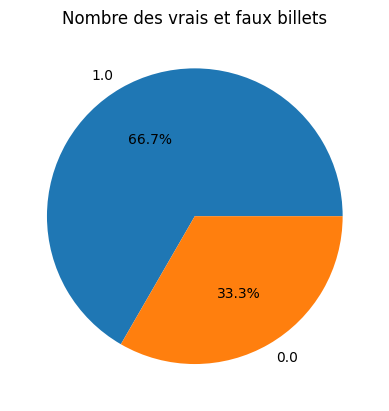

In [22]:
data=train_df['target'].value_counts()
labels=data.index
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Nombre des vrais et faux billets')
plt.show()

1=Vrais
0=faux

## 2.3 Nettoyage des données

In [23]:
#Nombre des valeurs manquantes dans chaque colonne
train_df.isnull().sum()

target           0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

On a 37 valeurs manquantes dans la colonne margin_low

In [24]:
# Pourçentage des valeurs manquantes 
print('Percent of missing "margin_low" records is %.2f%%' %((train_df['margin_low'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "margin_low" records is 2.47%


~2,5% des données dans la colonne margin_low est manquantes. -> voir la distribution de cette variable

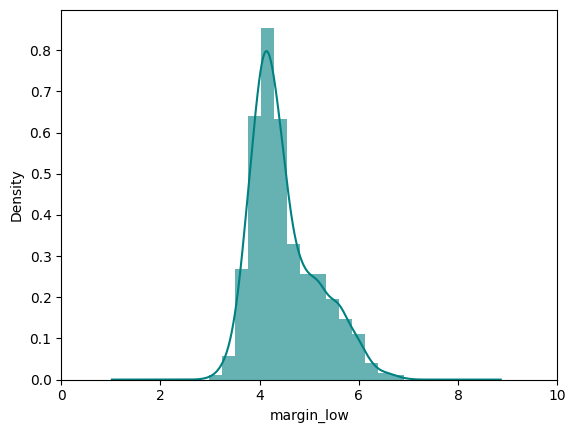

In [25]:
ax = train_df["margin_low"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["margin_low"].plot(kind='density', color='teal')
ax.set(xlabel='margin_low')
plt.xlim(0,10)
plt.show()

la mediane de margin_low est entre 4 et 5 mm.<br> On va essayer la regression lineaire pour l'imputation des valeurs manquantes.

### 2.3.1 Imputation des valeurs manquantes

In [26]:
train_df

,target,diagonal,height_left,height_right,margin_low,margin_up,length
0,1.0,171.81,104.86,104.95,4.52,2.89,112.83
1,1.0,171.46,103.36,103.66,3.77,2.99,113.09
2,1.0,172.69,104.48,103.50,4.40,2.94,113.16
3,1.0,171.36,103.91,103.94,3.62,3.01,113.51
4,1.0,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0.0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0.0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0.0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0.0,172.06,104.28,104.06,5.17,3.46,112.25


In [27]:
#Elimination de la target de notre DataFrame
#y=train_df['target']
#train_df.drop(columns='target', inplace=True)

On a un DataFrame qui contient X=6 (features)

## Imputation des valeurs manquantes

## les valeurs manquantes sont de type numerique

*** 1. La methode regression lineaire de sklearn ***

In [28]:
# Séparer les données en deux ensembles : avec et sans valeurs manquantes

test= train_df[train_df['margin_low'].isna()] #DataFrame qui contient que des valeurs manquantes dans la colonne margin_low

train = train_df[~train_df['margin_low'].isna()] #dataframe sans valeurs manquantes

In [29]:
test.shape

(37, 7)

In [30]:
train.shape

(1463, 7)

In [31]:
# Diviser les données en variables explicatives (X) et la variable cible (y)
#les variables explicative (X)
X_train = train.drop(columns=['margin_low', 'target']) 
X_train.head()

,diagonal,height_left,height_right,margin_up,length
0,171.81,104.86,104.95,2.89,112.83
1,171.46,103.36,103.66,2.99,113.09
2,172.69,104.48,103.50,2.94,113.16
3,171.36,103.91,103.94,3.01,113.51
4,171.73,104.28,103.46,3.48,112.54


In [32]:
# Création d'une instance de StandardScaler
scaler_1 = StandardScaler()
# Adapter le scaler aux données
scaler_1.fit(X_train)

# Standardiser les données
X_train_scaled = scaler_1.transform(X_train)
X_train_scaled[:5]

array([[-0.48859357,  2.76680735,  3.17376615, -1.13698239,  0.17784229],
       [-1.63480853, -2.24148961, -0.80685073, -0.7048056 ,  0.47569209],
       [ 2.39331832,  1.49803879, -1.30057066, -0.92089399,  0.55588243],
       [-1.96229852, -0.40511406,  0.05715913, -0.61837024,  0.95683409],
       [-0.75058556,  0.83026586, -1.42400064,  1.41286065, -0.15437481]])

In [33]:
#la variable cible (y) (target)
y_train= train['margin_low']
y_train.shape

(1463,)

In [34]:
# Initialiser les modèles
models = {
    'Linear Regression': LinearRegression(),
    'Naive Model (median)': DummyRegressor(strategy='median'),
    'Naive Model (Mean)': DummyRegressor(strategy='mean')
}

# La validation croisée et les scores RMSE pour chaque modèle
results = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = (-scores) ** 0.5
    results[model_name] = {'mean_rmse': rmse_scores.mean(), 'std_rmse': rmse_scores.std()}

# Affichage des résultats
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Mean RMSE: {result['mean_rmse']}")
    print(f"Standard deviation of RMSE: {result['std_rmse']}\n")


Model: Linear Regression
Mean RMSE: 0.48164583801892363
Standard deviation of RMSE: 0.11550617228305025

Model: Naive Model (median)
Mean RMSE: 0.6822920177155671
Standard deviation of RMSE: 0.31702538904937455

Model: Naive Model (Mean)
Mean RMSE: 0.7213898563877186
Standard deviation of RMSE: 0.20682302212606174



Selon les métriques de RMSE (erreur), le modèle de régression linéaire démontre la meilleure performance parmi les trois modèles testés.

In [35]:
## Model_1: Régression linéaire
# Créer et entraîner le modèle de régression linéaire
model_1 = LinearRegression()
model_1.fit(X_train_scaled, y_train)

LinearRegression()

In [36]:
#creation de la variable X_test
X_test = test.drop(columns=['margin_low', 'target'])

In [37]:
X_test.head()

,diagonal,height_left,height_right,margin_up,length
72,171.94,103.89,103.45,3.25,112.79
99,171.93,104.07,104.18,3.14,113.08
151,172.07,103.80,104.38,3.02,112.93
197,171.45,103.66,103.80,3.62,113.27
241,171.83,104.14,104.06,3.02,112.36


In [38]:
# Standardisation des données de X_test
X_test_scaled = scaler_1.transform(X_test)
X_test_scaled[:5]

array([[-0.06285659, -0.47189135, -1.45485813,  0.41885404,  0.13201924],
       [-0.09560559,  0.12910429,  0.79773902, -0.05654042,  0.46423633],
       [ 0.3628804 , -0.77238917,  1.41488892, -0.57515256,  0.2923999 ],
       [-1.66755753, -1.23983022, -0.3748458 ,  2.01790815,  0.68189581],
       [-0.42309557,  0.36282481,  0.42744908, -0.57515256, -0.36057852]])

In [39]:
# Prédire les valeurs manquantes
y_predicted = model_1.predict(X_test_scaled)

In [40]:
y_predicted.shape

(37,)

In [41]:
y_predicted

array([4.31852466, 4.39366755, 4.41045663, 4.31901423, 4.6506171 ,
       3.80330831, 4.17973608, 4.12744154, 4.13503418, 4.16053851,
       4.17742026, 3.76855378, 4.05876385, 4.29804709, 4.16060746,
       4.09406453, 4.43984627, 4.47065037, 4.34164322, 4.08041448,
       3.61430588, 4.37181147, 4.09362068, 4.24962896, 3.89374829,
       3.74633265, 4.23741481, 4.71053287, 4.13778022, 5.05027715,
       4.80214523, 5.067584  , 5.04756967, 4.77896717, 5.726993  ,
       5.18586214, 5.14004269])

In [42]:
#Creation d'une copy de notre DataFrame
df_reg=train_df.copy()

In [43]:
# Remplacement des valeurs manquantes par les valeurs prédites
df_reg.loc[df_reg['margin_low'].isna(), 'margin_low'] = y_predicted

In [44]:
#Verification
df_reg.isnull().sum()

target          0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [45]:
# preview adjusted train data
df_reg.head()

,target,diagonal,height_left,height_right,margin_low,margin_up,length
0,1.0,171.81,104.86,104.95,4.52,2.89,112.83
1,1.0,171.46,103.36,103.66,3.77,2.99,113.09
2,1.0,172.69,104.48,103.50,4.40,2.94,113.16
3,1.0,171.36,103.91,103.94,3.62,3.01,113.51
4,1.0,171.73,104.28,103.46,4.04,3.48,112.54


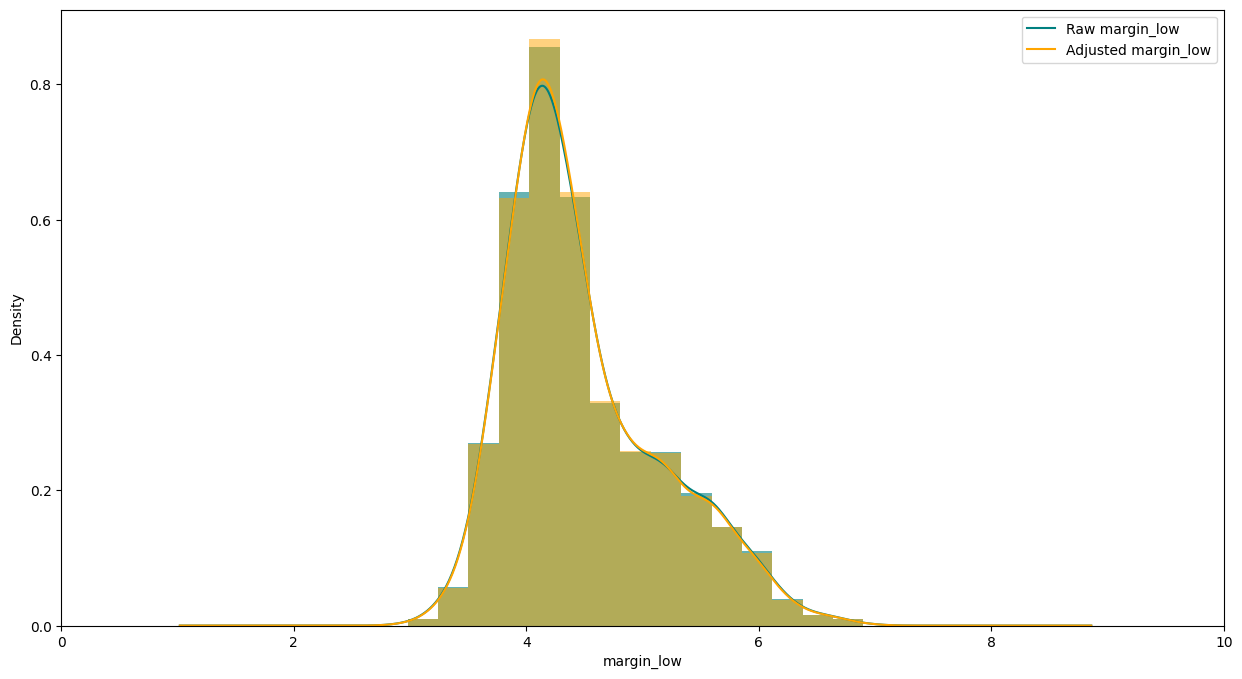

In [46]:
#Verification avec visualisation
plt.figure(figsize=(15,8))
ax = train_df["margin_low"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["margin_low"].plot(kind='density', color='teal')
ax = df_reg["margin_low"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
df_reg["margin_low"].plot(kind='density', color='orange')
ax.legend(['Raw margin_low', 'Adjusted margin_low'])
ax.set(xlabel='margin_low')
plt.xlim(0,10)
plt.show()

2. La méthode de régression linéaire de Statsmodels

In [47]:
# Créer et ajuster le modèle aux données d'entraînement
model_2 = sm.OLS(y_train, X_train_scaled)
model_fit = model_2.fit()

# Faire des prédictions sur les données de test mises à l'échelle
predicted_values = model_fit.predict(X_test_scaled)

# Afficher les valeurs prédites
print(predicted_values)

[-0.16744253 -0.09229964 -0.07551056 -0.16695296  0.16464991 -0.68265889
 -0.30623111 -0.35852565 -0.35093301 -0.32542868 -0.30854693 -0.71741341
 -0.42720334 -0.1879201  -0.32535973 -0.39190266 -0.04612093 -0.01531682
 -0.14432397 -0.40555271 -0.87166131 -0.11415572 -0.39234651 -0.23633823
 -0.5922189  -0.73963454 -0.24855238  0.22456568 -0.34818697  0.56430996
  0.31617803  0.58161681  0.56160248  0.29299998  1.24102581  0.69989494
  0.6540755 ]


In [48]:
#On a besoin d'une constante dans ce maodéle
X_train_scaled_with_const = sm.add_constant(X_train_scaled)
X_test_scaled_with_const = sm.add_constant(X_test_scaled)
X_test_scaled_with_const[:5]

array([[ 1.        , -0.06285659, -0.47189135, -1.45485813,  0.41885404,
         0.13201924],
       [ 1.        , -0.09560559,  0.12910429,  0.79773902, -0.05654042,
         0.46423633],
       [ 1.        ,  0.3628804 , -0.77238917,  1.41488892, -0.57515256,
         0.2923999 ],
       [ 1.        , -1.66755753, -1.23983022, -0.3748458 ,  2.01790815,
         0.68189581],
       [ 1.        , -0.42309557,  0.36282481,  0.42744908, -0.57515256,
        -0.36057852]])

In [49]:
model_2 = sm.OLS(y_train, X_train_scaled_with_const).fit()

In [50]:
model_2.params

const    4.485967
x1      -0.033912
x2       0.055145
x3       0.083331
x4       0.059278
x5      -0.357115
dtype: float64

In [51]:
y_train.mean()

4.485967190704033

In [52]:
predicted_values = model_2.predict(X_test_scaled_with_const)

In [53]:
predicted_values

array([4.31852466, 4.39366755, 4.41045663, 4.31901423, 4.6506171 ,
       3.80330831, 4.17973608, 4.12744154, 4.13503418, 4.16053851,
       4.17742026, 3.76855378, 4.05876385, 4.29804709, 4.16060746,
       4.09406453, 4.43984627, 4.47065037, 4.34164322, 4.08041448,
       3.61430588, 4.37181147, 4.09362068, 4.24962896, 3.89374829,
       3.74633265, 4.23741481, 4.71053287, 4.13778022, 5.05027715,
       4.80214523, 5.067584  , 5.04756967, 4.77896717, 5.726993  ,
       5.18586214, 5.14004269])

In [54]:
df_stat=train_df.copy()

In [55]:
df_stat.loc[df_stat['margin_low'].isnull(), 'margin_low'] = predicted_values

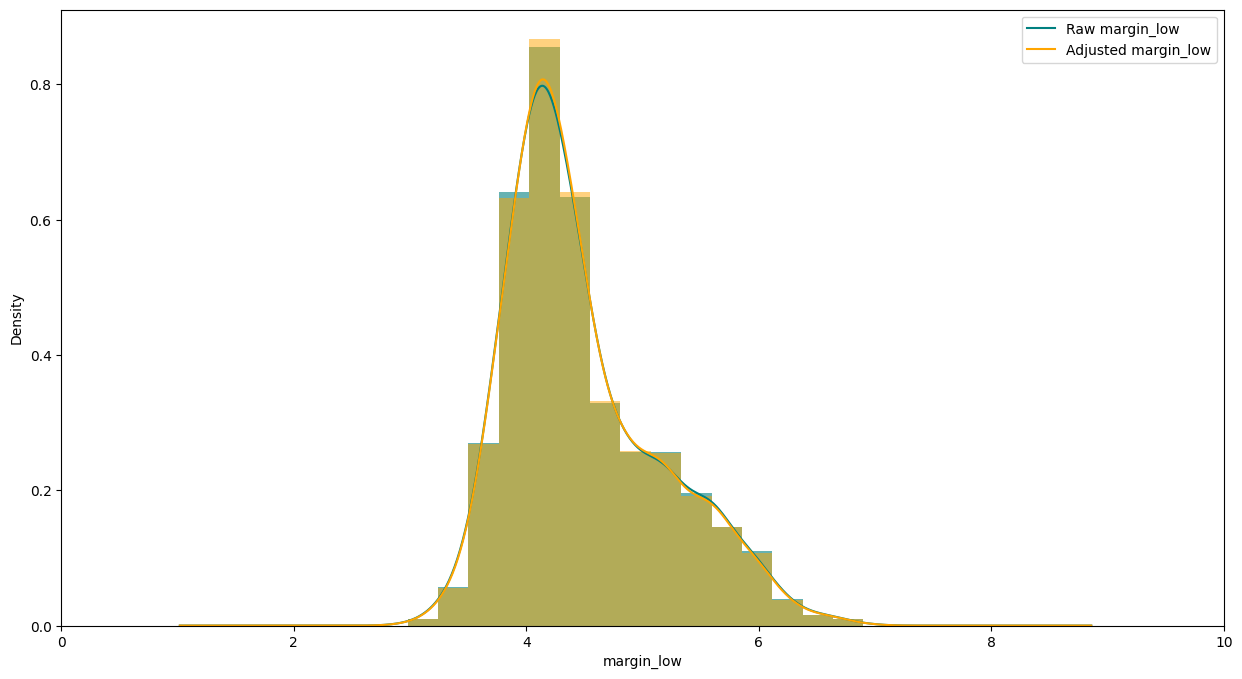

In [56]:
#Verification avec visualisation
plt.figure(figsize=(15,8))
ax = train_df["margin_low"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["margin_low"].plot(kind='density', color='teal')
ax = df_stat["margin_low"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
df_stat["margin_low"].plot(kind='density', color='orange')
ax.legend(['Raw margin_low', 'Adjusted margin_low'])
ax.set(xlabel='margin_low')
plt.xlim(0,10)
plt.show()

***Exploration des données***

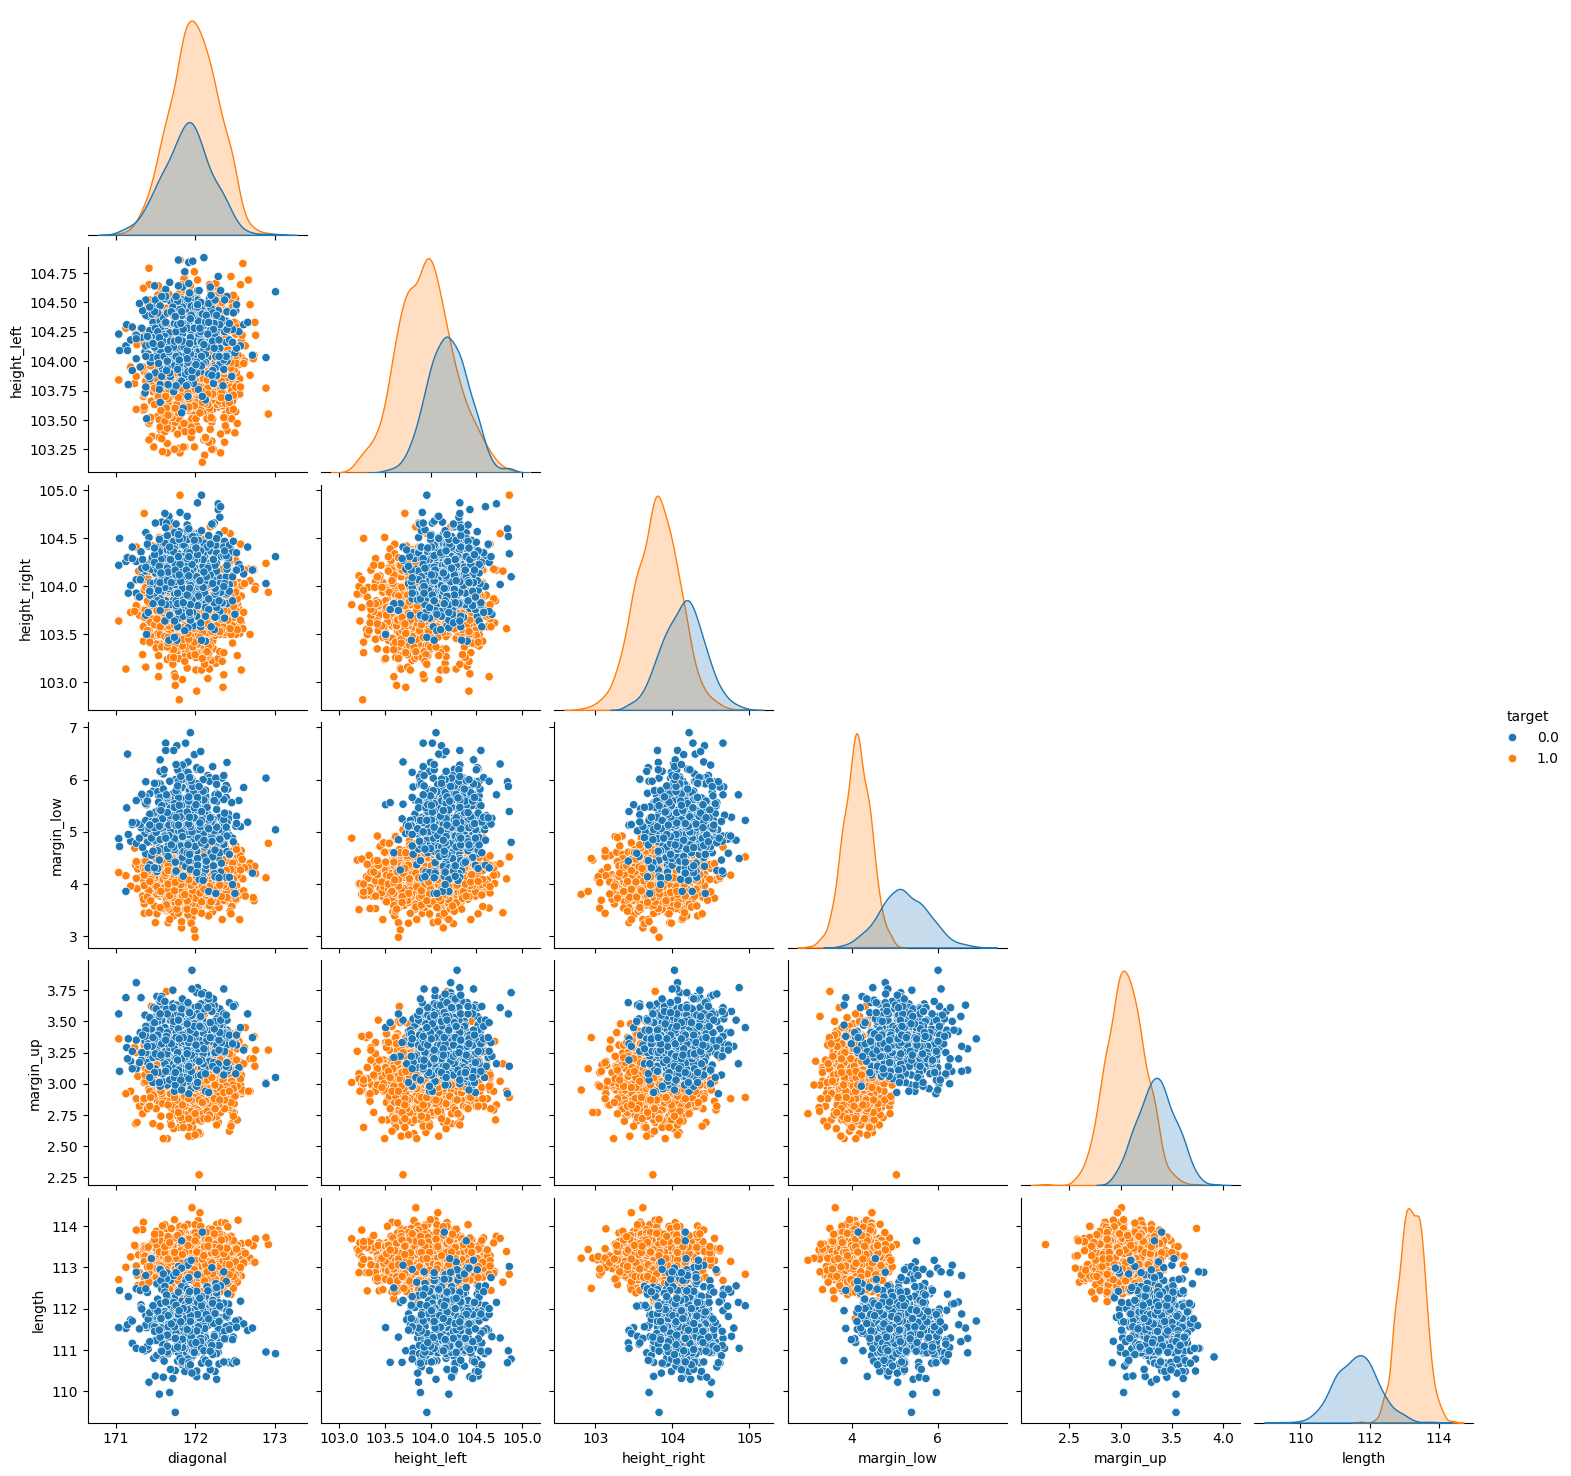

In [57]:
sns.pairplot(df_reg, hue='target', corner=True)
plt.show()

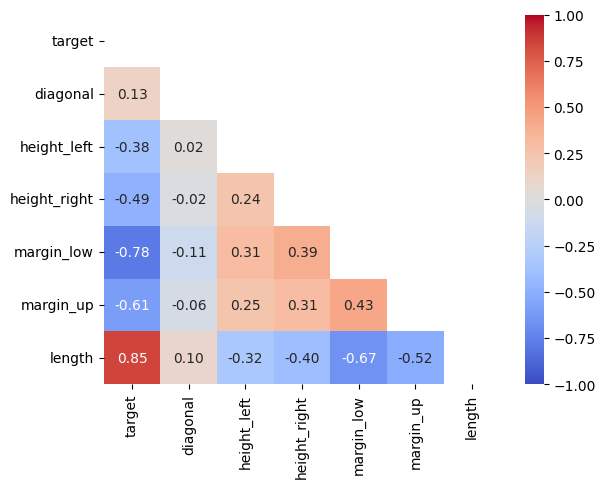

In [58]:
correlation_matrix = df_reg.corr()
masque=np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=masque, vmin=-1, vmax=1)
plt.show()

la target est tres correlée avec la longeur des billets

## 2.3.2 Detection des outliers

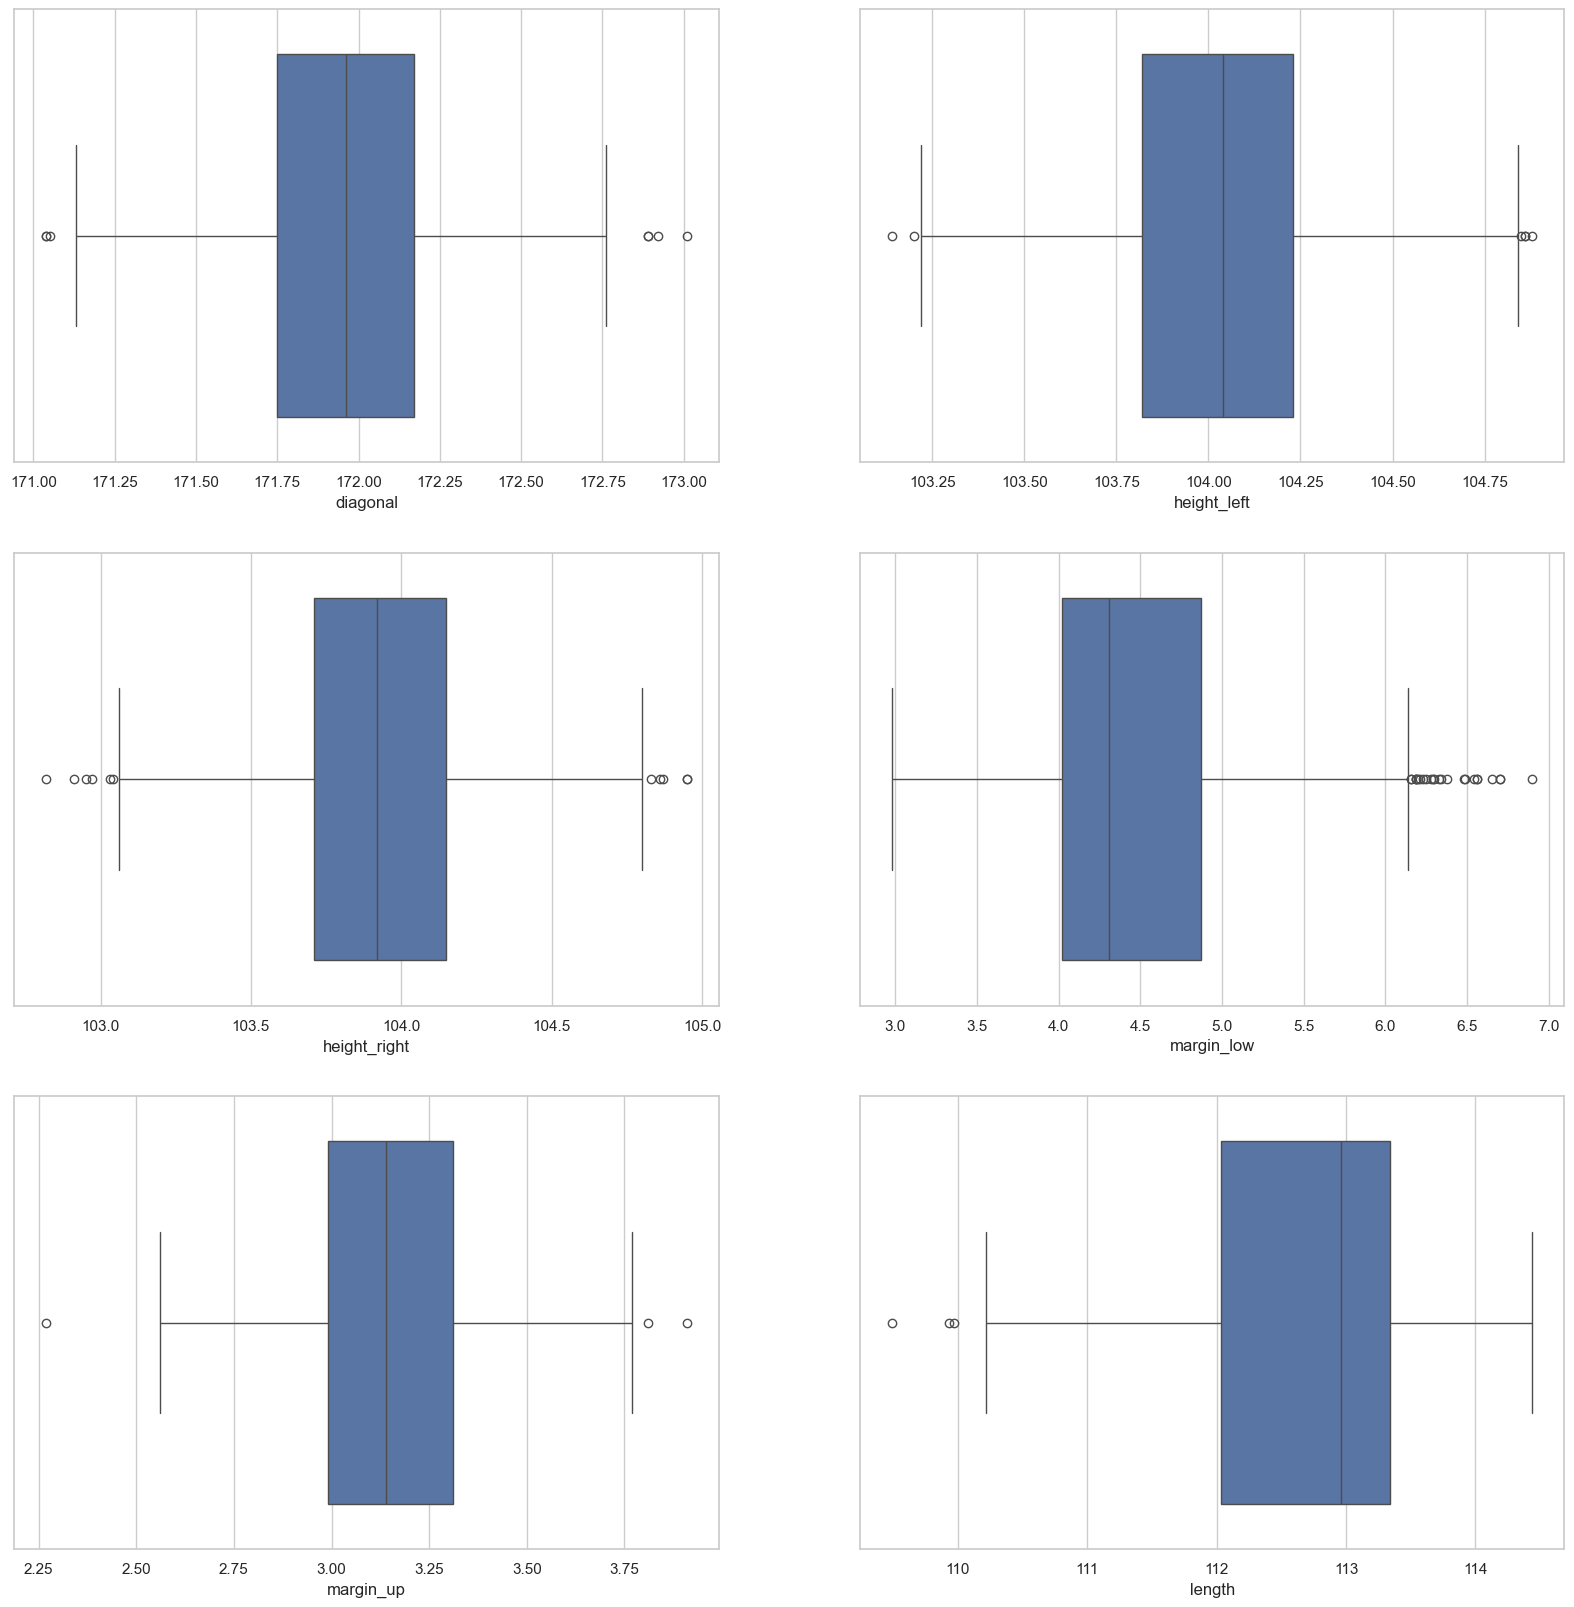

In [59]:
plt.figure(figsize=(20, 20))
sns.set_theme(style="whitegrid")

plt.subplot(321)
sns.boxplot(data=df_reg, x='diagonal')

plt.subplot(322)
sns.boxplot(data=df_reg, x='height_left')

plt.subplot(323)
sns.boxplot(data=df_reg, x='height_right')

plt.subplot(324)
sns.boxplot(data=df_reg, x='margin_low')

plt.subplot(325)
sns.boxplot(data=df_reg, x='margin_up')

plt.subplot(326)
sns.boxplot(data=df_reg, x='length')

plt.show()

Les boxplots montrent des outliers dans plusieurs features. Ceci peut indiquer que ces outliers pourraient être associés aux faux billets qui se distinguent par leurs dimensions non conformes

## 2.3.1.1 Data mining

## 2.4 Preparation des données

## Choix du modéle

Type de données categorielle


In [60]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   target        1500 non-null   float64
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(7)
memory usage: 82.2 KB


In [69]:
X=df_reg.drop(columns=['target'])
y=df_reg['target']

In [79]:
df_reg

,target,diagonal,height_left,height_right,margin_low,margin_up,length
0,1.0,171.81,104.86,104.95,4.52,2.89,112.83
1,1.0,171.46,103.36,103.66,3.77,2.99,113.09
2,1.0,172.69,104.48,103.50,4.40,2.94,113.16
3,1.0,171.36,103.91,103.94,3.62,3.01,113.51
4,1.0,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0.0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0.0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0.0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0.0,172.06,104.28,104.06,5.17,3.46,112.25


In [70]:
# Création d'une instance de StandardScaler
scaler_2 = StandardScaler()
# Adapter le scaler aux données
scaler_2.fit(X)

# Standardiser les données
X_scaled = scaler_2.transform(X)
X_scaled[:5]

array([[-0.48653957,  2.77412327,  3.16324041,  0.0553898 , -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.08198744, -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.12659056, -0.91256208,
         0.55190114],
       [-1.96149786, -0.39929381,  0.06049835, -1.30946288, -0.61049399,
         0.95307539],
       [-0.74875438,  0.83666863, -1.41407214, -0.67253163,  1.41767746,
        -0.15875038]])

In [71]:
# Initialiser les modèles
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'Majority Model': DummyClassifier(strategy='most_frequent')
}

# La validation croisée et les scores de précision pour chaque modèle
results = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    results[model_name] = {'mean_accuracy': scores.mean(), 'std_accuracy': scores.std()}

# Affichage des résultats
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Mean Accuracy: {result['mean_accuracy']}")
    print(f"Standard deviation of Accuracy: {result['std_accuracy']}\n")


Model: Logistic Regression
Mean Accuracy: 0.9906666666666666
Standard deviation of Accuracy: 0.0032659863237109116

Model: SVC
Mean Accuracy: 0.99
Standard deviation of Accuracy: 0.004216370213557866

Model: Majority Model
Mean Accuracy: 0.6666666666666666
Standard deviation of Accuracy: 0.0



In [87]:
Logistic_Regression = LogisticRegression()
svc = SVC()
Majority_Model = DummyClassifier(strategy='most_frequent')

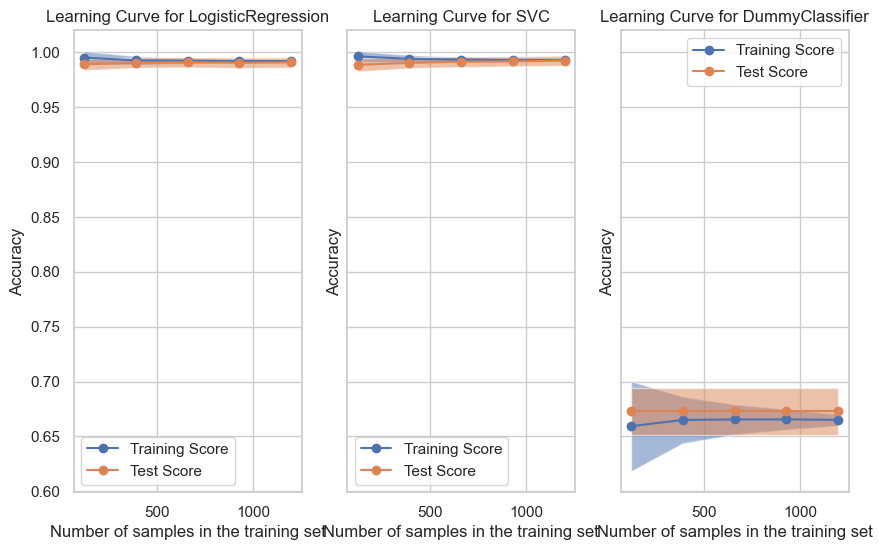

In [76]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_scaled,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([Logistic_Regression, svc, Majority_Model]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [77]:
# Définir la grille des hyperparamètres à rechercher
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialiser LogisticRegression
logistic_regression = LogisticRegression()

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Exécuter la recherche sur grille sur les données d'entraînement
grid_search.fit(X_scaled, y)

# Afficher les meilleurs hyperparamètres et le score associé
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.9906666666666666


In [78]:
best_model = grid_search.best_estimator_

In [80]:
y_pred = best_model.predict(X_scaled)

In [82]:
mat=confusion_matrix(y, y_pred)
mat

array([[490,  10],
       [  4, 996]], dtype=int64)

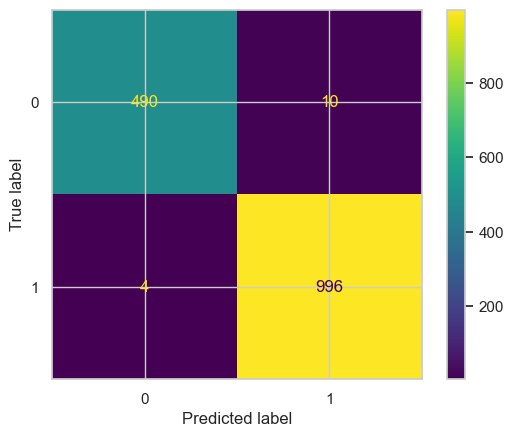

In [83]:
disp = ConfusionMatrixDisplay(confusion_matrix=mat)
disp.plot()
plt.show()

In [89]:
# Initialiser les modèles
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'Majority Model': DummyClassifier(strategy='most_frequent')
}

# La validation croisée et les scores de précision pour chaque modèle
results = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='average_precision')
    results[model_name] = {'mean_accuracy': scores.mean(), 'std_accuracy': scores.std()}

# Affichage des résultats
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Mean Accuracy: {result['mean_accuracy']}")
    print(f"Standard deviation of Accuracy: {result['std_accuracy']}\n")


Model: Logistic Regression
Mean Accuracy: 0.9990853775325602
Standard deviation of Accuracy: 0.0013279504267462694

Model: SVC
Mean Accuracy: 0.9977372202193031
Standard deviation of Accuracy: 0.0033965220694092326

Model: Majority Model
Mean Accuracy: 0.6666666666666666
Standard deviation of Accuracy: 0.0



In [100]:
# Définir la grille des hyperparamètres à rechercher
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialiser LogisticRegression
logistic_regression = LogisticRegression()

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='average_precision')

# Exécuter la recherche sur grille sur les données d'entraînement
grid_search.fit(X_scaled, y)

# Afficher les meilleurs hyperparamètres et le score associé
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.9993210646428068


In [101]:
best_model = grid_search.best_estimator_

In [102]:
y_pred = best_model.predict(X_scaled)

In [103]:
mat=confusion_matrix(y, y_pred)
mat

array([[492,   8],
       [  6, 994]], dtype=int64)

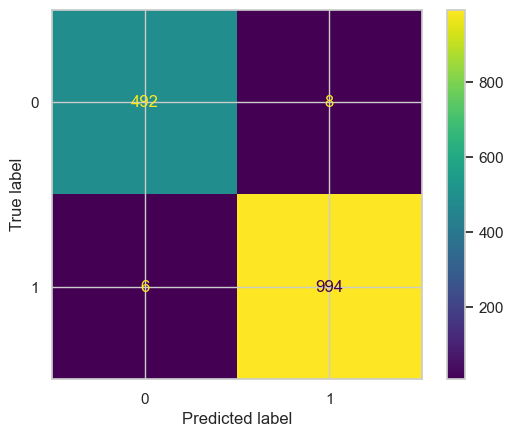

In [104]:
disp = ConfusionMatrixDisplay(confusion_matrix=mat)
disp.plot()
plt.show()

2.5 Modelisation

2.5.1 Dummy clussifier

In [260]:
estimator_1= DummyClassifier(strategy="most_frequent")
estimator_1.fit(train_X, train_y)

DummyClassifier(strategy='most_frequent')

In [261]:
y_pred_1 = estimator_1.predict(test_X)
y_pred_1[:5]

array([1., 1., 1., 1., 1.])

In [262]:
pd.Series(y_pred_1).value_counts()

1.0    450
Name: count, dtype: int64

In [263]:
test_y.value_counts(normalize=True)

target
1.0    0.642222
0.0    0.357778
Name: proportion, dtype: float64

In [264]:
test_y.value_counts()

target
1.0    289
0.0    161
Name: count, dtype: int64

In [265]:
test_y.values

array([0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1.

In [266]:
train_y

485     1.0
527     1.0
199     1.0
889     1.0
844     1.0
       ... 
1130    0.0
1294    0.0
860     1.0
1459    0.0
1126    0.0
Name: target, Length: 1050, dtype: float64

In [267]:
train_X

array([[-0.42098587,  0.87007302, -1.04542951, -0.73319175,  0.72723612,
         0.60921175],
       [-0.12599421, -0.8001465 , -1.78271476, -0.97583223, -1.51669826,
         0.3685072 ],
       [-0.19154792,  1.3043301 ,  0.3062601 , -0.15692062, -0.22212073,
         0.21949962],
       ...,
       [-1.89594416, -0.66652894,  0.21409944, -0.06593044, -0.13581557,
         0.91868903],
       [-0.58487013,  0.9368818 , -0.30814427,  2.58794978,  0.42516803,
        -1.76344737],
       [-0.38820902,  0.10177204,  0.55202185,  0.58616584,  0.42516803,
        -1.87806859]])

In [268]:
tr_score= estimator_1.score(train_X, train_y)
te_score= estimator_1.score(test_X, test_y)
print(f"le score de train est {tr_score}, et de test est {te_score}")

le score de train est 0.6771428571428572, et de test est 0.6422222222222222


In [269]:
y_pred_1 = estimator_1.predict(test_X)
y_pred_1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [270]:
test_y.values

array([0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1.

In [271]:
1 - abs(y_pred_1 - test_y.values).mean()

0.6422222222222222

In [272]:
mat=confusion_matrix(test_y, y_pred_1, labels=estimator_1.classes_)
mat

array([[  0, 161],
       [  0, 289]], dtype=int64)

In [273]:
test_y.value_counts()

target
1.0    289
0.0    161
Name: count, dtype: int64

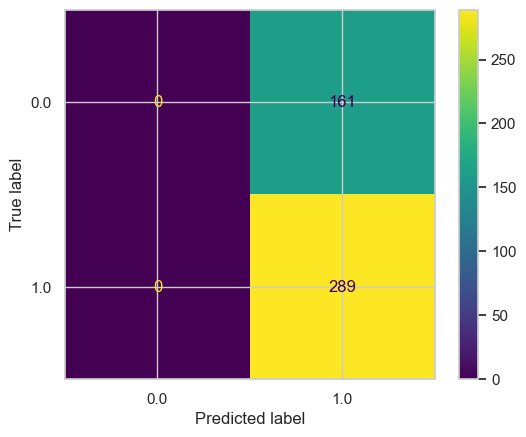

In [274]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
disp = ConfusionMatrixDisplay(confusion_matrix=mat, display_labels= estimator_1.classes_)
disp.plot()
plt.show()

161 des billets (faux billets) ont ete mal classés

## 2. Regression logistique

In [275]:
estimator_2 = LogisticRegression(solver='liblinear') #small dataset

In [276]:
estimator_2.fit(train_X, train_y)

LogisticRegression(solver='liblinear')

In [277]:
y_pred_2=estimator_2.predict(test_X)
y_pred_2[:5]

array([0., 0., 1., 1., 1.])

In [278]:
y_prob = estimator_2.predict_proba(test_X).round(2) #La probabilité de l'appartenance à tel ou tel classe
y_prob[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [279]:

conf=confusion_matrix(test_y, y_pred_2, labels=estimator_2.classes_)
conf

array([[158,   3],
       [  1, 288]], dtype=int64)

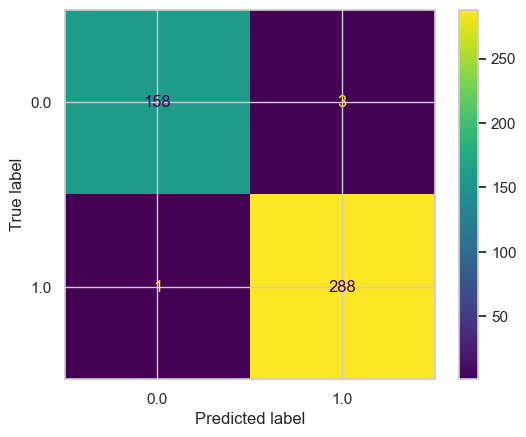

In [280]:

disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels= estimator_2.classes_)
disp.plot()
plt.show()

## SVM

In [281]:
estimator_3 = LinearSVC()

In [282]:
estimator_3.fit(train_X, train_y)

c:\Users\Nada\anaconda3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [283]:
y_pred_3=estimator_3.predict(test_X)
y_pred_3[:5]

array([0., 0., 1., 1., 1.])

In [284]:
conf=confusion_matrix(test_y, y_pred_3, labels=estimator_3.classes_)
conf

array([[158,   3],
       [  1, 288]], dtype=int64)

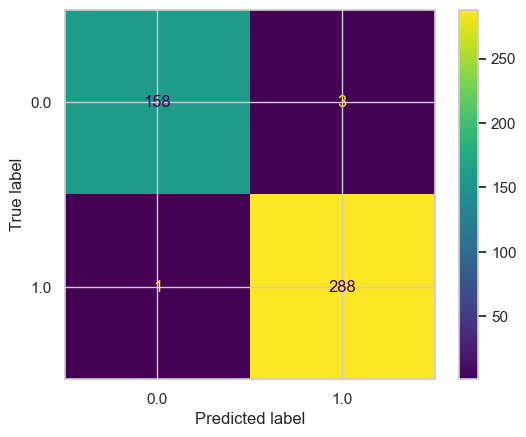

In [285]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels= estimator_3.classes_)
disp.plot()
plt.show()